# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | butte
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | gaoping
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | colonia menno
Processing Record 10 of Set 1 | kingscliff
Processing Record 11 of Set 1 | kushtia
Processing Record 12 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 13 of Set 1 | zemio
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | howrah
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | badovinci
Processing Record 18 of Set 1 | zalari
Processing Record 19 of Set 1 | ingeniero jacobacci
Processing Record 20 of Set 1 | cozumel
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | puer

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | miyazu
Processing Record 41 of Set 4 | sanya
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | kone
Processing Record 44 of Set 4 | bairnsdale
Processing Record 45 of Set 4 | lutjenburg
Processing Record 46 of Set 4 | natal
Processing Record 47 of Set 4 | boa vista
Processing Record 48 of Set 4 | acajutla
Processing Record 49 of Set 4 | popondetta
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | port augusta
Processing Record 2 of Set 5 | altai
Processing Record 3 of Set 5 | versailles
Processing Record 4 of Set 5 | wuyang
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | kozhikode
Processing Record 7 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 5 | fiambala
Processing Record 9 of Set 5 | enid
Processing Record 10 of Set 5 | petropavlovsk-kamchatsky
Processing Record 11 of Set 5 | macau
Processing Record 12 of S

Processing Record 30 of Set 8 | princeton
Processing Record 31 of Set 8 | emerald
Processing Record 32 of Set 8 | ust'-kut
Processing Record 33 of Set 8 | la passe
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | sinjar
Processing Record 36 of Set 8 | aral
Processing Record 37 of Set 8 | ishigaki
Processing Record 38 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 39 of Set 8 | hagere hiywet
Processing Record 40 of Set 8 | ouellah
City not found. Skipping...
Processing Record 41 of Set 8 | kenora
Processing Record 42 of Set 8 | calama
Processing Record 43 of Set 8 | airoli
Processing Record 44 of Set 8 | ponta delgada
Processing Record 45 of Set 8 | east london
Processing Record 46 of Set 8 | boguchany
Processing Record 47 of Set 8 | hakui
Processing Record 48 of Set 8 | genhe
Processing Record 49 of Set 8 | touros
Processing Record 0 of Set 9 | san jose
Processing Record 1 of Set 9 | buraydah
Processing Record 2 of Set 9 | viedma
Processing

Processing Record 17 of Set 12 | yaren
Processing Record 18 of Set 12 | khodzha-maston
Processing Record 19 of Set 12 | alofi
Processing Record 20 of Set 12 | tsetserleg
Processing Record 21 of Set 12 | namdrik
Processing Record 22 of Set 12 | rocha
Processing Record 23 of Set 12 | tashtagol
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | weyburn
Processing Record 27 of Set 12 | toliara
Processing Record 28 of Set 12 | walla walla
Processing Record 29 of Set 12 | greenville
Processing Record 30 of Set 12 | kale
Processing Record 31 of Set 12 | hopkinsville
Processing Record 32 of Set 12 | jeremie
Processing Record 33 of Set 12 | kyzyl-suu
Processing Record 34 of Set 12 | darovskoy
Processing Record 35 of Set 12 | nanao
Processing Record 36 of Set 12 | guangyuan
Processing Record 37 of Set 12 | bokoro
Processing Record 38 of Set 12 | songea
Processing Record 39 of Set 12 | morehead city
Processing Record 40 of Set 12 | fan

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butte,39.6499,-121.5677,28.54,38,0,3.96,US,1684890778
1,constantia,44.1833,28.6500,12.61,84,77,3.09,RO,1684891201
2,gaoping,30.7758,106.1029,20.59,71,0,2.07,CN,1684891310
3,anadyr,64.7500,177.4833,6.28,61,40,4.00,RU,1684891310
4,naze,28.3667,129.4833,23.51,63,14,6.26,JP,1684891310


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butte,39.6499,-121.5677,28.54,38,0,3.96,US,1684890778
1,constantia,44.1833,28.6500,12.61,84,77,3.09,RO,1684891201
2,gaoping,30.7758,106.1029,20.59,71,0,2.07,CN,1684891310
3,anadyr,64.7500,177.4833,6.28,61,40,4.00,RU,1684891310
4,naze,28.3667,129.4833,23.51,63,14,6.26,JP,1684891310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

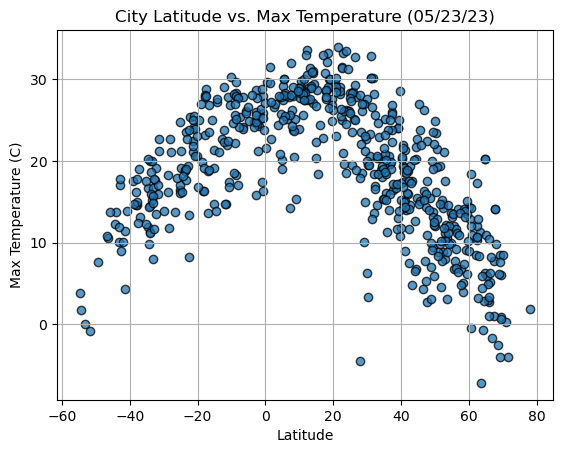

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.grid(True)
plt.scatter(x_values,y_values,edgecolor="black",linewidth=1,marker="o",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

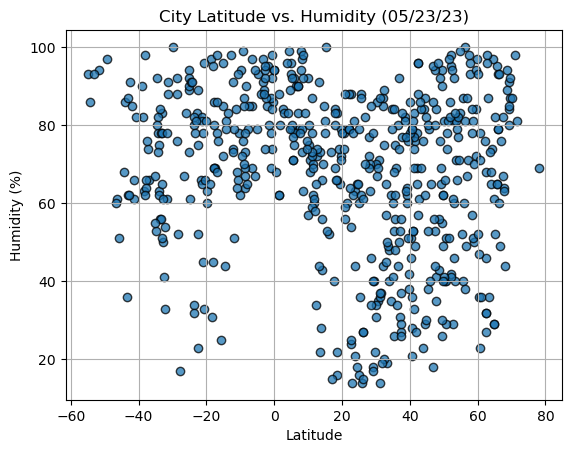

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.grid(True)
plt.scatter(x_values,y_values,edgecolor="black",linewidth=1,marker="o",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

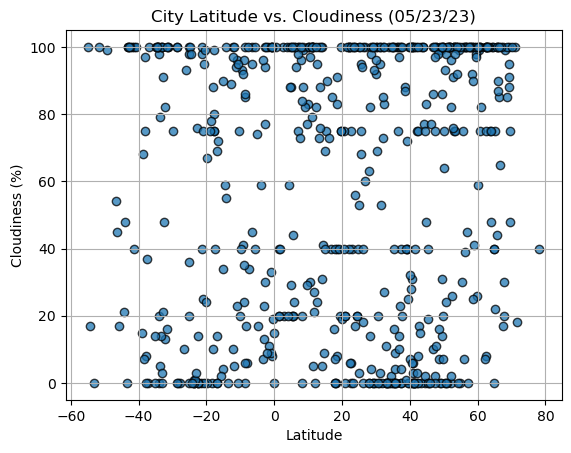

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.grid(True)
plt.scatter(x_values,y_values,edgecolor="black",linewidth=1,marker="o",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

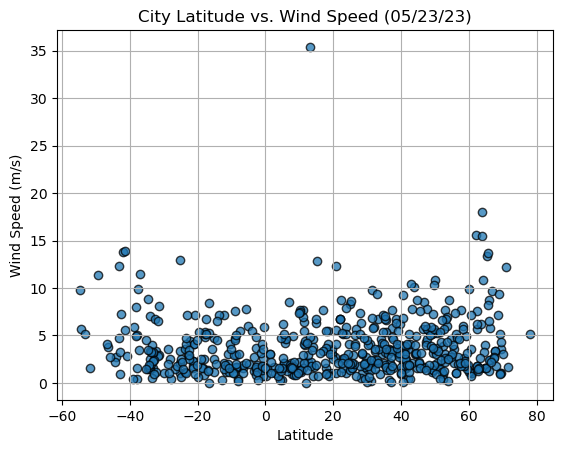

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.grid(True)
plt.scatter(x_values,y_values,edgecolor="black",linewidth=1,marker="o",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Define the regression line "y-values" from the slope and intercept, and show the line
    regression_parameters = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_parameters,"r")
    
    # Annotate the text for the line equation
    import textwrap
    plt.annotate(line_equation, text_coordinates,fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

# Number of Countries in Northern Hemisphere
len(northern_hemi_df)

407

In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

# Number of Countries in Southern Hemisphere
len(southern_hemi_df)

177

###  Temperature vs. Latitude Linear Regression Plot

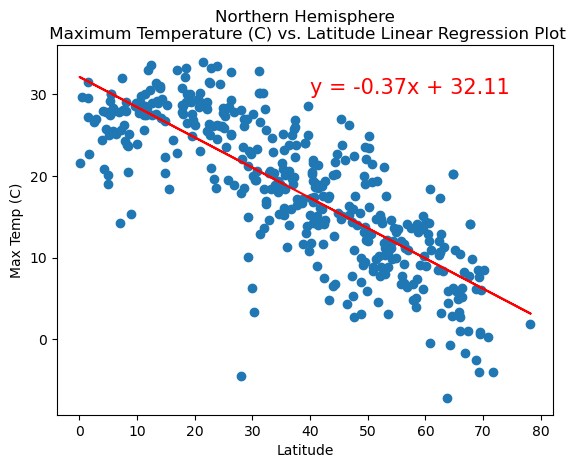

The p-value is: 0.000
The r-value is: -0.798


In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,"Northern Hemisphere\n Maximum Temperature (C) vs. Latitude Linear Regression Plot","Max Temp (C)",(40,30))

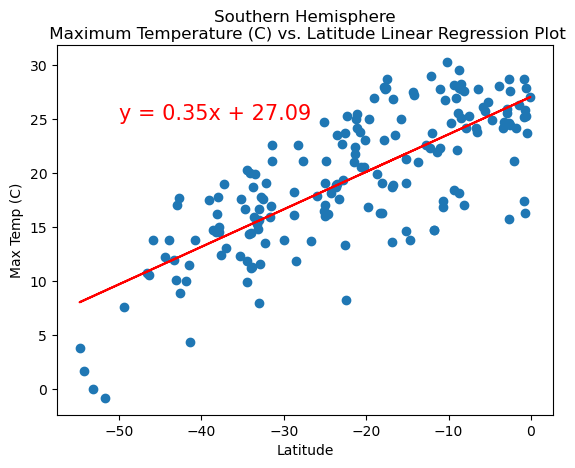

The p-value is: 0.000
The r-value is: 0.762


In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,"Southern Hemisphere\n Maximum Temperature (C) vs. Latitude Linear Regression Plot","Max Temp (C)",(-50,25))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative linear relationship between Latitude and Maximum Temperature.  That is, as the Latitude increases (away from the equator), the Maximum Temperature decreases.  In the Southern Hemisphere, there is a strong positive linear relationship between Latitude and Maximum Temperature.  That is, as the Latitude increases (towards the equator), the Maximum Temperature increases.  This pattern is also observed in the City Latitude vs. Max Temperature scatterplot graph as well.

### Humidity vs. Latitude Linear Regression Plot

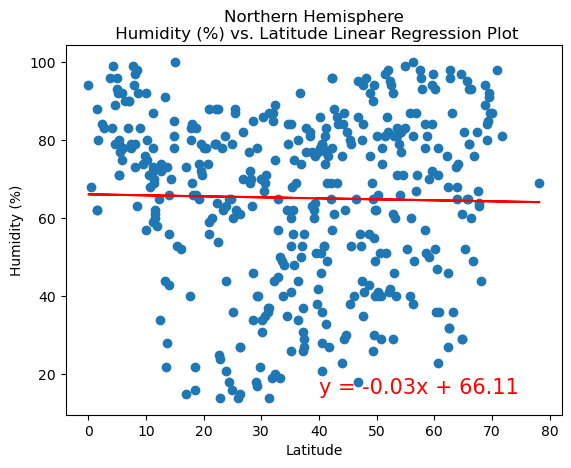

The p-value is: 0.658
The r-value is: -0.022


In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,"Northern Hemisphere\n Humidity (%) vs. Latitude Linear Regression Plot","Humidity (%)",(40,15))

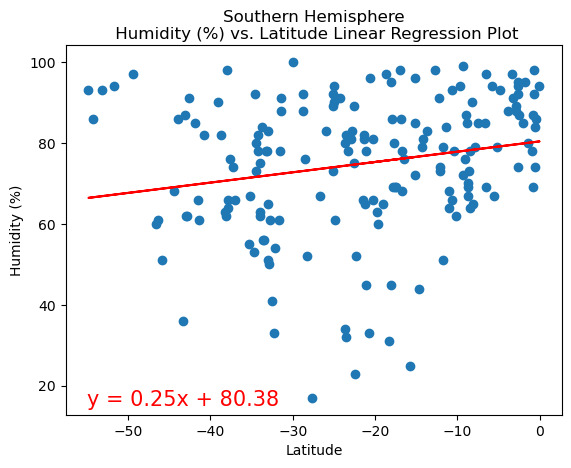

The p-value is: 0.006
The r-value is: 0.205


In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,"Southern Hemisphere\n Humidity (%) vs. Latitude Linear Regression Plot","Humidity (%)",(-55,15))

**Discussion about the linear relationship:** There is no statistically significant linear relationship between Latitude and percent Humidity in the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

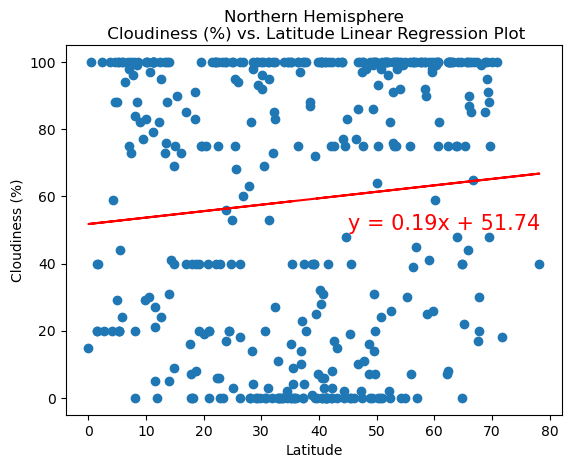

The p-value is: 0.069
The r-value is: 0.090


In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Northern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression Plot","Cloudiness (%)",(45,50))

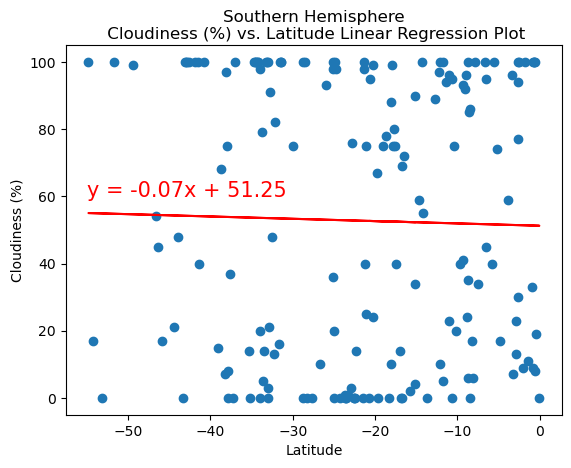

The p-value is: 0.760
The r-value is: -0.023


In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Southern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression Plot","Cloudiness (%)",(-55,60))

**Discussion about the linear relationship:** There is no statistically significant linear relationship between Latitude and percent Cloudiness in the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

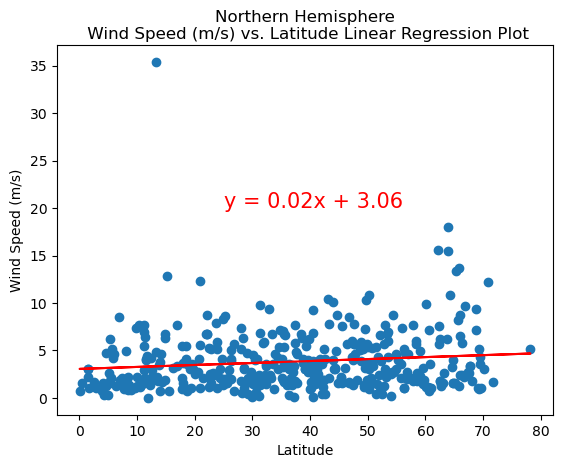

The p-value is: 0.013
The r-value is: 0.123


In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Northern Hemisphere\n Wind Speed (m/s) vs. Latitude Linear Regression Plot","Wind Speed (m/s)",(25,20))

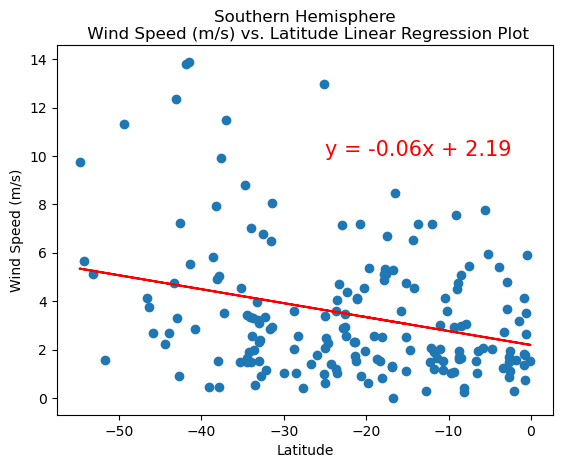

The p-value is: 0.000
The r-value is: -0.292


In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Southern Hemisphere\n Wind Speed (m/s) vs. Latitude Linear Regression Plot","Wind Speed (m/s)",(-25,10))

**Discussion about the linear relationship:** In the Northern Hemisphere, there is an extreme outlier city with Wind Speed of 35 m/s.  If that outlier is excluded (or examined for accuracy), no statistically significant linear relationship between Latitude and Wind Speed is observed.  In the Southern Hemispher, there is a very slight negative linear relationship between Latitude and Wind Speed.